# Introduction PyTorch

* machine learning with using `tensor`
* machine leanring with using `tensor`

In [27]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme(context='notebook', style='darkgrid')
from ml_illustration import MlExample
%reload_ext autoreload

## Training a model without GPU

The training time is: 0.736 seconds
Result: y = -0.04238407530278376 + 0.835264355717464 x + 0.007311958263787501 x^2 + -0.09027554573305958 x^3


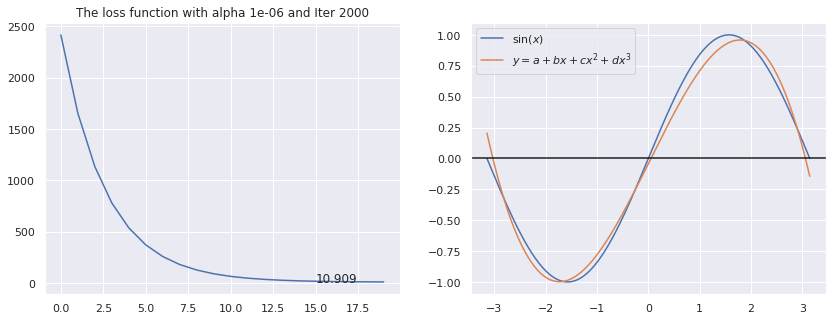

In [28]:
np.random.seed(176)
ml = MlExample()
ml.train_model1(1e-6, 2000)
ml.plot_results()

The training time is: 5.331 seconds
Result: y = 0.8415926490405949 + 0.4466639452857055 x + -0.46400496316159756 x^2 + -0.035000521311288404 x^3 + 0.04487462595592955 x^4


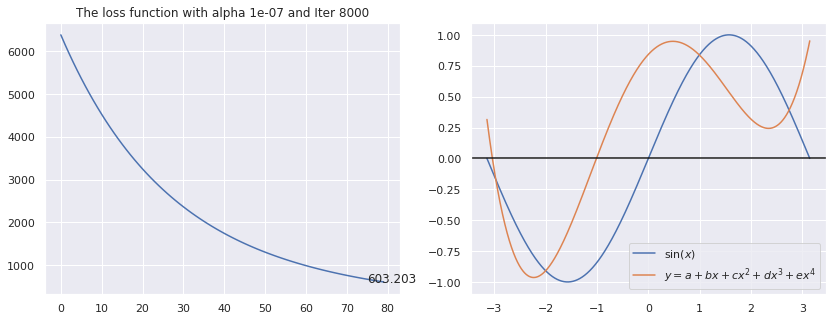

In [29]:
ml.train_model2(1e-7, 8000)
ml.plot_results()

The training time is: 6.658 seconds
Result: y = -0.254343600587253 + 0.6447029304989954 x + 0.13991845859270924 x^2 + -0.06316984241922304 x^3 + -0.01352124229040049 x^4


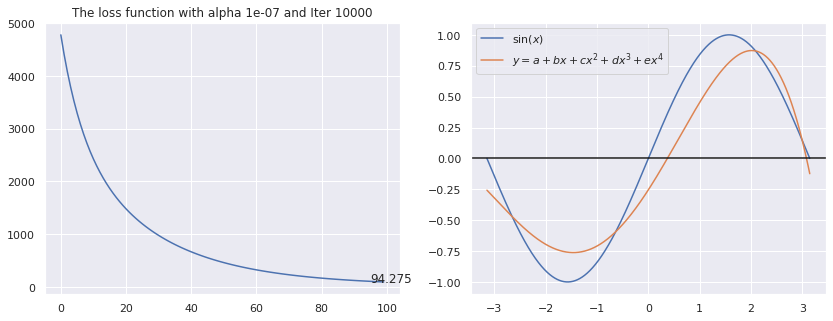

In [30]:
ml.train_model2(1e-7, 10000)
ml.plot_results()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/root/ESL/ch0/ml_illustration.py:132: RuntimeWarning: overflow encountered in square
  d -= learning_rate * grad_d
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/root/ESL/ch0/ml_illustration.py:150: RuntimeWarning: invalid value encountered in double_scalars
  ax[1].plot(self.x, self.pred, label=r"$y = a+bx+cx^2+dx^3+ex^4$")


The training time is: 4.945 seconds
Result: y = nan + nan x + nan x^2 + nan x^3 + nan x^4 + nan x^5


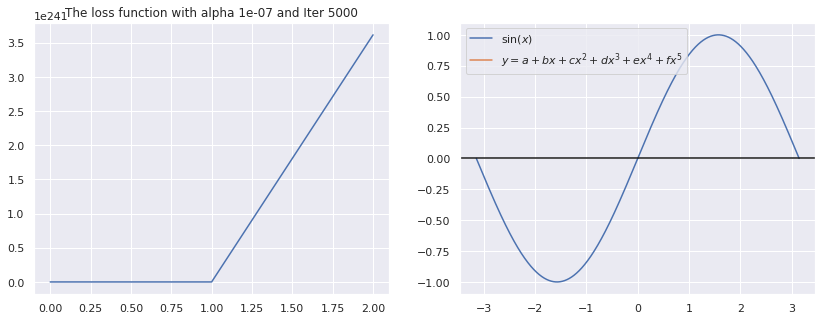

In [31]:
ml.train_model3(1e-7, 5000)
ml.plot_results()

The training time is: 4.891 seconds
Result: y = -0.14033826321325324 + 0.11619704504903053 x + 1.4092617604433244 x^2 + 0.3708400103703527 x^3 + -0.18108901930849855 x^4 + -0.04543122357441472 x^5


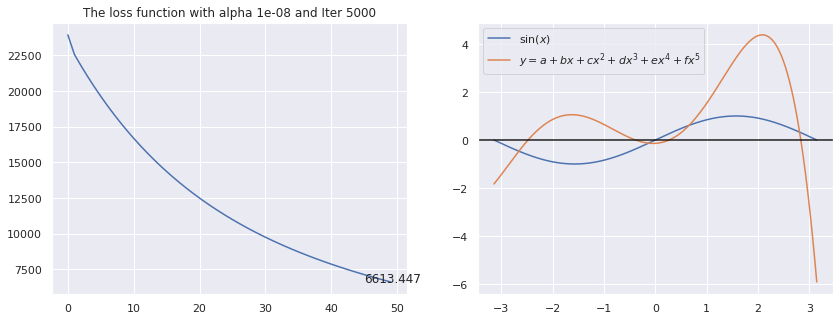

In [32]:
ml.train_model3(1e-8, 5000)
ml.plot_results()

The training time is: 14.494 seconds
Result: y = 0.4636958763544799 + -0.291445435236514 x + 0.33287146183368393 x^2 + 0.330286334804357 x^3 + -0.051987204035833075 x^4 + -0.03383179129311959 x^5


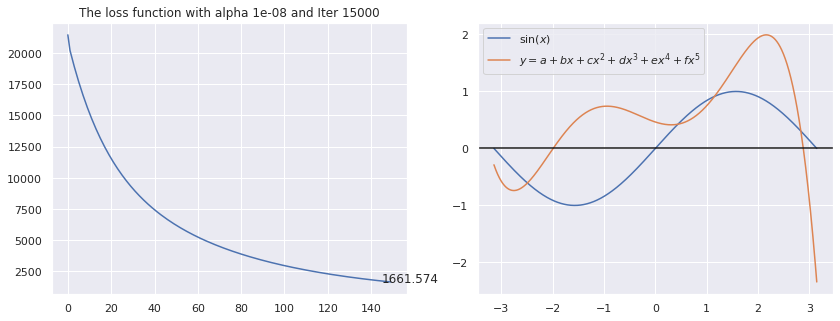

In [33]:
ml.train_model3(1e-8, 15000)
ml.plot_results()

The training time is: 24.974 seconds
Result: y = -0.570678228576528 + -1.1710044883398396 x + 0.5601369715983983 x^2 + 0.6502657800382139 x^3 + -0.06242887730918558 x^4 + -0.05925624320215162 x^5


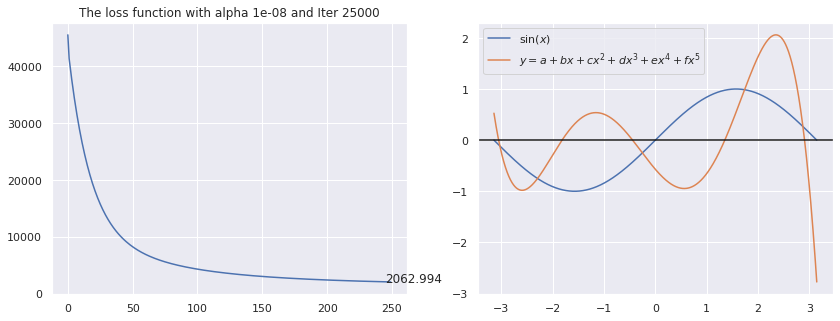

In [34]:
ml.train_model3(1e-8, 25000)
ml.plot_results()

## Training a model with GPU